In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd    
import scipy.io
# style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [3]:
path = '/content/drive/MyDrive/Complex_Networks/HW01/facebook101_princton_weighted.mat'
mat = scipy.io.loadmat(path)
A = mat['A']
print(A)

  (41, 0)	0.23341986187511532
  (74, 0)	-0.8310836341707424
  (183, 0)	0.3630774693417993
  (199, 0)	-0.4255819109410841
  (330, 0)	-0.8915522179046713
  (342, 0)	0.6004699460747422
  (438, 0)	0.559033155005757
  (638, 0)	-0.15789912487319158
  (639, 0)	-0.3689795200377264
  (700, 0)	0.667096028355807
  (762, 0)	0.6388290129260563
  (790, 0)	-0.5971903653879409
  (813, 0)	-0.9203448232766431
  (908, 0)	-0.5661217215565775
  (1001, 0)	-0.40887388509123834
  (1074, 0)	0.14383939484847108
  (1084, 0)	0.4229554254707699
  (1179, 0)	0.3118105095583956
  (1195, 0)	0.014127530389211218
  (1226, 0)	-0.47309716640306787
  (1252, 0)	-0.013995007645000168
  (1343, 0)	-0.3969440595287481
  (1415, 0)	0.49268599971253546
  (1435, 0)	-0.21118357393040132
  (1489, 0)	-0.250254338391553
  :	:
  (3083, 6595)	-0.2566179533318984
  (3255, 6595)	-0.16483967626475793
  (3311, 6595)	-0.9284036578868178
  (3487, 6595)	0.9428205382791961
  (3647, 6595)	-0.42217693188211425
  (3668, 6595)	-0.36534361853547503
 

In [4]:
G = nx.from_scipy_sparse_matrix(A)
print(nx.info(G))

Graph with 6596 nodes and 293320 edges


# Question1_Part1: Degree Distribution Plot

In [ ]:
def plot_log_degree_distribution(G):
  degs = {}
  for n in G.nodes():
    deg = G.degree(n) 
    if deg not in degs:
      degs[deg] = 0 
    degs[deg] += 1
  items = sorted(degs.items())

  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)
  ax.plot([key for (key,value) in items], [value for (key,value) in items],c='darkcyan') 
  ax.set_xscale('log') 
  ax.set_yscale('log')
  ax.set_xlabel("log Degree")
  ax.set_ylabel("log Frequency of Nodes")
  plt.title("Degree Distribution Log Plot")
  plt.show()
  fig.savefig("degree_distribution_log.png")

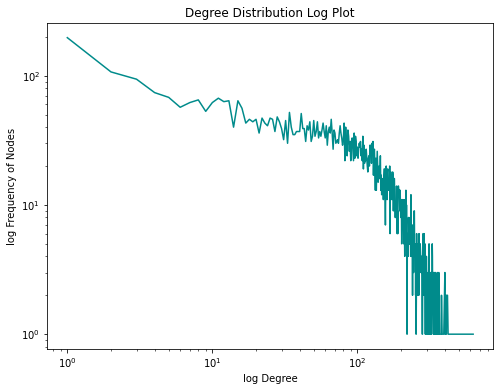

In [ ]:
plot_log_degree_distribution(G)

In [ ]:
def plot_degree_distribution(G):
  degs = {}
  for n in G.nodes():
    deg = G.degree(n) 
    if deg not in degs:
      degs[deg] = 0 
    degs[deg] += 1
  items = sorted(degs.items())

  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)
  ax.plot([key for (key,value) in items], [value for (key,value) in items],c='orangered') 
  ax.set_xlabel("Degree")
  ax.set_ylabel("Frequency of Nodes")
  plt.title("Degree Distribution Plot")
  plt.show()
  fig.savefig("degree_distribution.png")

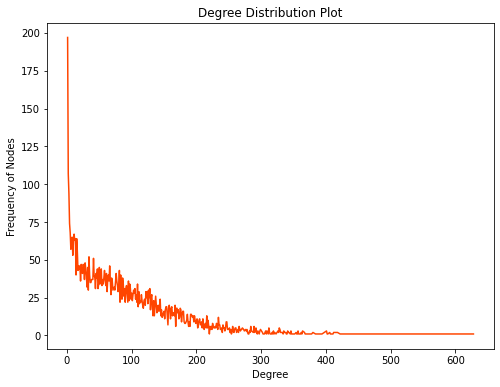

In [ ]:
plot_degree_distribution(G)

# part2: finding 7 length paths

In [ ]:
from numpy.linalg import matrix_power

adjacency_matrix = nx.to_numpy_matrix(G, weight=None)
adj_7 = matrix_power(adjacency_matrix, 7)
np.sum(adj_7)/2

6.128511995623708e+18

# part 5: connected components

In [ ]:
def find_connected_components(graph):
  seen_nodes = set()
  for v in graph:
    if v not in seen_nodes:
      G_adj = graph.adj
      seen = set()
      nextlevel = {v}
      while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
          if v not in seen:
              seen.add(v)
              nextlevel.update(G_adj[v])
      seen_nodes.update(seen)
      yield seen

connected_components_list = [G.subgraph(c).copy() for c in find_connected_components(G)]
print("number of connected components is: ",len(connected_components_list))

cc_size=[]
for component in connected_components_list:
  cc_size.append(component.number_of_nodes())

print("size of connected components: ",sorted(cc_size,reverse=True))

number of connected components is:  10
size of connected components:  [6575, 3, 3, 3, 2, 2, 2, 2, 2, 2]


In [6]:
print("size of connected components: ",[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])

size of connected components:  [6575, 3, 3, 3, 2, 2, 2, 2, 2, 2]


# part3: diameter

## diameter of each component

In [ ]:
nx.diameter(connected_components_list[0])

9

In [ ]:
for i in range(1,10):
  print(nx.diameter(connected_components_list[i]))

1
2
1
1
2
1
1
1
1


## longest path length

In [ ]:
import sys
sys.setrecursionlimit(50000)
print(sys.getrecursionlimit())

50000


In [ ]:
def DFS(graph, src, prev_len, max_len, visited): 
  visited[src] = 1 
  curr_len = 0
  adjacent = None
  G_adj = graph.adj
  for adjacent in list(G_adj[src].keys()): 
    if not visited[adjacent]: 
        curr_len = prev_len + 1
        DFS(graph, adjacent, curr_len, max_len, visited) 
    if (max_len[0] < curr_len):  
        max_len[0] = curr_len  
    curr_len = 0

In [ ]:
max_len = [-999999999999]
G0 = connected_components_list[0]
for node in G0.nodes():
  if node%250 == 0:
    print(node)
  visited = [False] * G.number_of_nodes()
  DFS(G0, node, 0, max_len, visited)

print()
print(max_len[0])
0

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500

5896


0

# part 4: global clustering coefficient

https://notebook.community/SubhankarGhosh/NetworkX/4.%20Cliques,%20Triangles%20and%20Graph%20Structures%20(Instructor)


In [ ]:
number_of_triangles = sum(nx.triangles(G).values()) / 3
number_of_triangles

2520541.0

In [ ]:
from numpy.linalg import matrix_power

adjacency_matrix = nx.to_numpy_matrix(G, weight=None)
adj_3 = matrix_power(adjacency_matrix, 3)

In [ ]:
print("number of triangles: ",np.trace(adj_3)/6)

number of triangles:  2520541.0


In [ ]:
from itertools import combinations

#finding number of open triangles

def get_open_triangles(G, node):
    open_triangle_nodes = []
    neighbors = set(G.neighbors(node))
    
    for n1, n2 in combinations(neighbors, 2):
        if not G.has_edge(n1, n2):
            open_triangle_nodes.append([n1, node, n2])
    
    return open_triangle_nodes

In [ ]:
s = 0
for i in range(G.number_of_nodes() ):
  s += len(get_open_triangles(G,i))
w = s

In [ ]:
print("global clustering coefficient is : ",6*number_of_triangles/w)

global clustering coefficient is :  0.3920165748018862
